# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

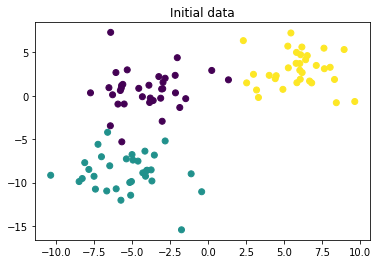

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [4]:
e_dist = lambda a, b: np.linalg.norm(a - b)

def get_knn_classes(val, ns, k = 1):
    nn = np.zeros((ns.shape[0]), dtype = [('dist', 'float64'), ('class', 'int')])
    for i in range(ns.shape[0]):
        nn[i] = e_dist(val, ns[i][:val.shape[0]]), ns[i][-1]
    return np.sort(nn, order = 'dist')[:k]['class']
    
def get_nn_class(nn):
    counts = np.bincount(nn)
    max_i, max_v = 0, counts[0]
    for i in range(1, counts.shape[0]):
        if counts[i] > max_v:
            max_i, max_v = i, counts[i]
    return max_i

def get_class(val, data, k = 1):
    return get_nn_class(get_knn_classes(val, data, k))

def funct_kNN(x_train, x_test, y_train, k):
    y_test = np.zeros(x_test.shape[0])
    ns = np.concatenate((x_train, np.array([y_train]).T), axis=1)
    for i in range(x_test.shape[0]):
        y_test[i] = get_class(x_test[i], ns, k)
    return y_test

def get_accuracy(real, result):
    return real[real == result].shape[0] / real.shape[0]

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state=17)

ks = 1, 3, 5, 7, 9

In [6]:
for k in ks:
    res = funct_kNN(x_train, x_test, y_train, k)
    acc = get_accuracy(y_test, res)
    print(f'k == {k}: {acc}')

k == 1: 0.96
k == 3: 0.96
k == 5: 0.98
k == 7: 0.98
k == 9: 0.98


Постройте разделающие поверхности, которые строит классификатор

In [7]:
def draw_surface(X, Y, k, h = .5):
    x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
    y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

    Z = funct_kNN(X, np.vstack((xx.ravel(), yy.ravel())).transpose(), Y, k)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=plt.cm.coolwarm)
    plt.title(f'k == {k}')

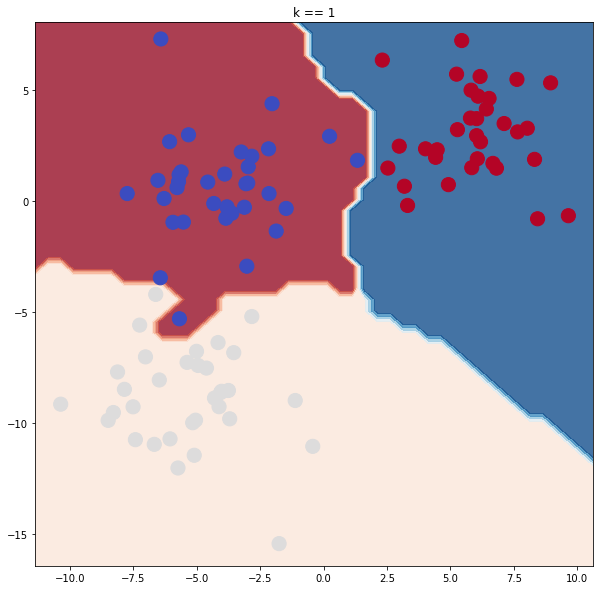

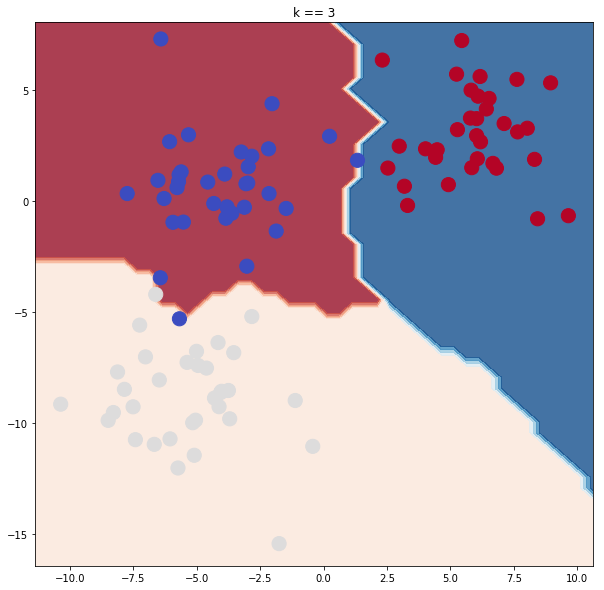

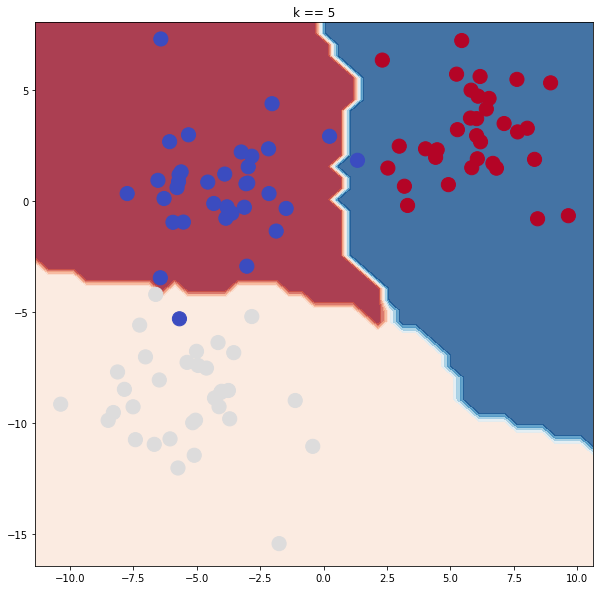

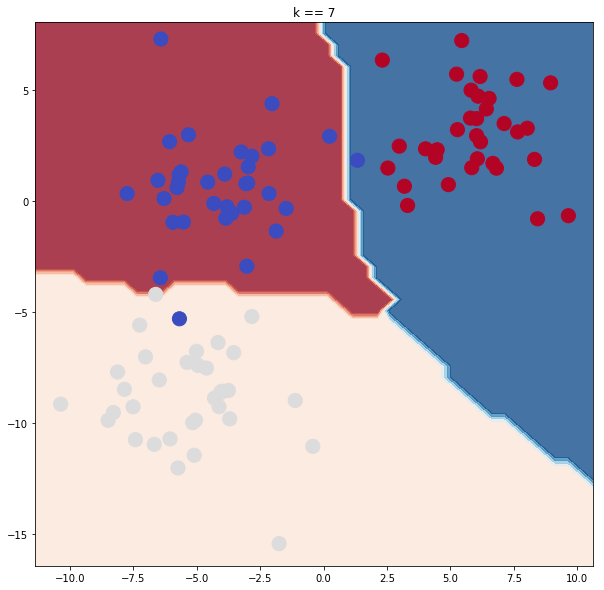

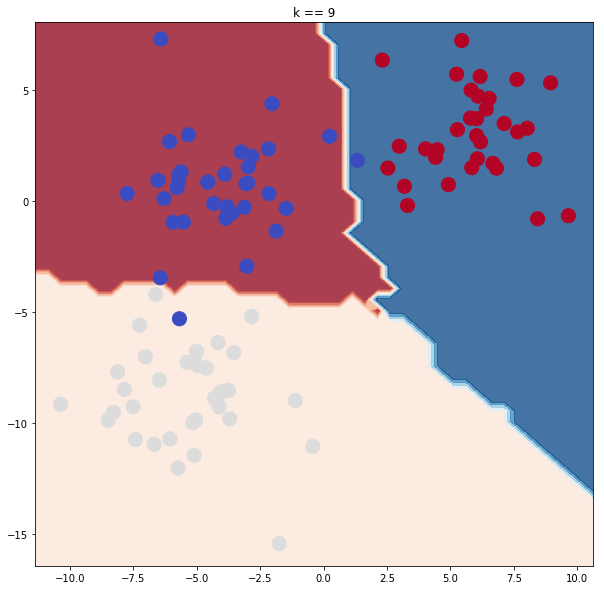

In [8]:
for k in ks:
    draw_surface(X, Y, k)

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [9]:
def get_knn_regr_vals(val, ns, k):
    nn = np.zeros(ns.shape[0], dtype = [('x', 'float64'), ('y', 'float64')])
    for i in range(ns.shape[0]):
        nn[i] = np.abs(val - ns[i, 0]), ns[i, 1]
    return np.sort(nn, order = 'x')[:k]['y']

def knn_regr(x_train, x_test, y_train, k):
    y_test = np.zeros(x_test.shape[0])
    ns = np.dstack((x_train, y_train))[0]
    for i in range(x_test.shape[0]):
        y_test[i] = np.mean(get_knn_regr_vals(x_test[i], ns, k))
    return y_test

In [10]:
sample_size = 10

X = np.arange(0, 5, .05)
Y = np.sin(X)

idxs = np.arange(X.shape[0])
np.random.shuffle(idxs)
train_idxs = idxs[:sample_size]

x_train, y_train = X[train_idxs], Y[train_idxs]
x_test = X
y_trains = {k: knn_regr(x_train, x_test, y_train, k) for k in ks}

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

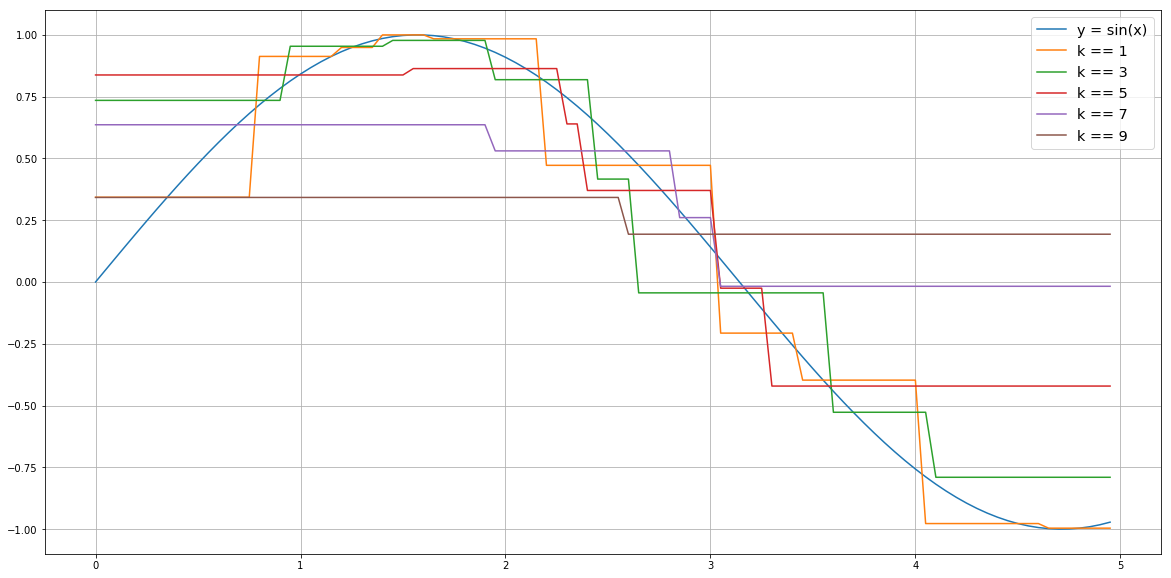

In [11]:
plt.figure(figsize = (20, 10))
plt.plot(X, Y, label = 'y = sin(x)')
for k in ks:
    plt.plot(X, y_trains[k], label = f'k == {k}')
plt.grid()
plt.legend(fontsize = 'x-large')